This project aims to utilize Natural Language Processing (NLP) techniques to analyze sentiments and tweets related to the conflict between Ukraine and Russia. By processing large volumes of text data from social media platforms or other sources, the goal is to gain insights into public opinion, attitudes, and trends regarding the conflict. The analysis could include identifying key themes, sentiment trends over time, and potentially predicting future developments based on the analysis.

In [3]:
import os #Provides functions for interacting with the operating system
import sys #Provides functions and variables that are used to manipulate different parts of the Python runtime environment.
from tempfile import NamedTemporaryFile #Creates temporary files that are automatically deleted when they are closed.
from urllib.request import urlopen #Opens a URL and returns a file-like object for reading from it.
from urllib.parse import unquote #Decodes a URL-encoded string.
from urllib.parse import urlparse #Parses a URL into its components.
from urllib.error import HTTPError #Represents an HTTP error
from zipfile import ZipFile #Provides tools for creating, reading, writing, and extracting ZIP files.
import tarfile #Provides tools for reading and writing tar archives.
import shutil #Provides functions for file operations, such as copying and deleting files.

CHUNK_SIZE = 40960 #The size of each chunk to download data in bytes.
DATA_SOURCE_MAPPING = 'ukraine-war-tweets-dataset-65-days:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1981187%2F3271147%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240402%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240402T195345Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5c343b606262335dd6ecb74b4d99d1976331e848975987561122c8a5ff3464787ad1c6aa8cc172a0fbdc6ac00df95e5efd84d53788961b7b8351affefa5d827373a4bced04c461caacfbdc20937aaf7de8966830a5f8b45d7d919cb819e74a4b9fd1cffe0ac00f44cd7d75781cc84f5a84918e68dcda19ff06ea1a4f52a7416ca76f944475895bf8be896ef28f039423a2fae3a08b8042743d5bf8352e6f574b4bb781f45f3f0476472acaa671c7908a19fc9ef83d19120e190bc8db2c733bdd7ff833381472dbf3064b41371dd32bef0adabf6d0645ff5f0b9b23b90d09a38ff5c61639c9f87c58cf0e55ed2c590e2055143ddbe280836b9192268493ddb146'

KAGGLE_INPUT_PATH='/kaggle/input' #The path to the Kaggle input directory.
KAGGLE_WORKING_PATH='/kaggle/working' #The path to the Kaggle working directory.
KAGGLE_SYMLINK='kaggle' #The name of the symlink to create for the input and working directories.

!umount /kaggle/input/ 2> /dev/null #This command is used to ensure that the /kaggle/input/ directory is not already mounted before attempting to remove it.
shutil.rmtree('/kaggle/input', ignore_errors=True)
##The ignore_errors=True argument ensures that any errors encountered during the removal process are ignored, allowing the command to continue executing.
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
#This command creates the /kaggle/input/ directory if it does not already exist. The 0o777 argument specifies the permissions for the newly created directory
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)
#This command creates the /kaggle/working/ directory if it does not already exist, using similar arguments as the previous command.

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass
#these blocks ensure that the necessary symlinks are created to provide convenient access to the Kaggle input and working directories from the current working directory.

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded) #The unquote function is used to decode the URL-encoded download URL, converting it back to a regular URL
    filename = urlparse(download_url).path # The urlparse function is used to parse the download URL and extract the path component
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 639830851 bytes downloaded
Downloaded and uncompressed: ukraine-war-tweets-dataset-65-days
Data source import complete.


In [4]:
import numpy as np
import pandas as pd

#this code snippet provides a way to recursively list all files in a directory and its subdirectories
import os
for dirname, _, filenames in os.walk('/kaggle/input'): #Starts a loop that uses os.walk to iterate over all the files and directories within the /kaggle/input directory
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/ukraine-war-tweets-dataset-65-days/Russia_invade.csv
/kaggle/input/ukraine-war-tweets-dataset-65-days/Ukraine_border.csv
/kaggle/input/ukraine-war-tweets-dataset-65-days/Ukraine_troops.csv
/kaggle/input/ukraine-war-tweets-dataset-65-days/StandWithUkraine.csv
/kaggle/input/ukraine-war-tweets-dataset-65-days/Ukraine_war.csv
/kaggle/input/ukraine-war-tweets-dataset-65-days/Russian_border_Ukraine.csv
/kaggle/input/ukraine-war-tweets-dataset-65-days/Russian_troops.csv
/kaggle/input/ukraine-war-tweets-dataset-65-days/Ukraine_nato.csv


In [5]:
import numpy as np
data = pd.read_csv("/kaggle/input/ukraine-war-tweets-dataset-65-days/Ukraine_war.csv")
data #Prints the DataFrame data. This will display the contents of the CSV file as a table, showing rows and columns of data.

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,Searh
0,snscrape.modules.twitter.Tweet,https://twitter.com/ksenijapavlovic/status/150...,2022-03-05 23:59:58+00:00,There was an anti war protest for #Ukraine as ...,There was an anti war protest for #Ukraine as ...,1500259859937337349,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,4,25,...,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,NaN,NaN,NaN,NaN,['Ukraine'],NaN,Ukraine war
1,snscrape.modules.twitter.Tweet,https://twitter.com/ty_phoon31/status/15002598...,2022-03-05 23:59:58+00:00,https://t.co/Z1pURKlNHu NATO followed USA into...,abc.net.au/news/2022-03-0… NATO followed USA i...,1500259857160568834,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ukraine war
2,snscrape.modules.twitter.Tweet,https://twitter.com/ann_peace22/status/1500259...,2022-03-05 23:59:54+00:00,@mfa_russia @RusEmbUSA @RussiaUN @MFA_Ukraine ...,@mfa_russia @RusEmbUSA @RussiaUN @MFA_Ukraine ...,1500259841520111616,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,1.500182e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,['IStandWithUkraine'],NaN,Ukraine war
3,snscrape.modules.twitter.Tweet,https://twitter.com/GardensR4Health/status/150...,2022-03-05 23:59:52+00:00,@nytimes This war could have been avoided by e...,@nytimes This war could have been avoided by e...,1500259833915883525,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,1.499516e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Ukraine war
4,snscrape.modules.twitter.Tweet,https://twitter.com/kbrunolieber/status/150025...,2022-03-05 23:59:52+00:00,@ggreenwald Remember the biggest mistake made ...,@ggreenwald Remember the biggest mistake made ...,1500259832649203713,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,2,...,NaN,NaN,1.500200e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Ukraine war
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231619,snscrape.modules.twitter.Tweet,https://twitter.com/PJPeluche/status/147670651...,2021-12-31 00:07:22+00:00,"Rusia wants to take back Ukraine, they are our...","Rusia wants to take back Ukraine, they are our...",1476706511221100544,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ukraine war
231620,snscrape.modules.twitter.Tweet,https://twitter.com/saradzhyan/status/14767061...,2021-12-31 00:06:03+00:00,"A positive for Russia is that, according to Us...","A positive for Russia is that, according to Us...",1476706178990284800,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,1,5,...,NaN,NaN,1.476705e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN,NaN,NaN,NaN,NaN,Ukraine war
231621,snscrape.modules.twitter.Tweet,https://twitter.com/melleferre/status/14767055...,2021-12-31 00:03:38+00:00,@kylegriffin1 @Karyn_resists “Further invades”...,@kylegriffin1 @Karyn_resists “Further invades”...,1476705571793481729,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,3,...,NaN,NaN,1.476687e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Ukraine war
231622,snscrape.modules.twitter.Tweet,https://twitter.com/Garret00074/status/1476705...,2021-12-31 00:03:22+00:00,@remid0d0s0 @BillKristol I fully support Ukrai...,@remid0d0s0 @BillKristol I fully support Ukrai...,1476705502436417536,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,NaN,NaN,1.476704e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231624 entries, 0 to 231623
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   _type             231624 non-null  object 
 1   url               231624 non-null  object 
 2   date              231624 non-null  object 
 3   content           231624 non-null  object 
 4   renderedContent   231624 non-null  object 
 5   id                231624 non-null  int64  
 6   user              231624 non-null  object 
 7   replyCount        231624 non-null  int64  
 8   retweetCount      231624 non-null  int64  
 9   likeCount         231624 non-null  int64  
 10  quoteCount        231624 non-null  int64  
 11  conversationId    231624 non-null  int64  
 12  lang              231624 non-null  object 
 13  source            231624 non-null  object 
 14  sourceUrl         231624 non-null  object 
 15  sourceLabel       231624 non-null  object 
 16  outlinks          76

In [7]:
data.describe()

,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,retweetedTweet,inReplyToTweetId
count,2.316240e+05,231624.000000,231624.000000,231624.000000,231624.000000,2.316240e+05,0.0,1.071210e+05
mean,1.491405e+18,1.410933,3.385405,15.841113,0.384960,1.490631e+18,NaN,1.490863e+18
std,5.576726e+15,31.610760,76.031900,537.609966,17.513811,1.844629e+16,NaN,1.387370e+16
min,1.476705e+18,0.000000,0.000000,0.000000,0.000000,2.605513e+17,NaN,2.605513e+17
25%,1.486706e+18,0.000000,0.000000,0.000000,0.000000,1.486533e+18,NaN,1.486416e+18
50%,1.491876e+18,0.000000,0.000000,0.000000,0.000000,1.491798e+18,NaN,1.491880e+18
75%,1.496234e+18,1.000000,0.000000,2.000000,0.000000,1.496213e+18,NaN,1.495886e+18
max,1.500260e+18,11734.000000,24134.000000,217883.000000,7454.000000,1.500260e+18,NaN,1.500260e+18


In [8]:
#This code snippet uses the isnull() method followed by the sum() method to count the number of missing values (null values) in each column of the data DataFrame
data.isnull().sum()

_type                    0
url                      0
date                     0
content                  0
renderedContent          0
id                       0
user                     0
replyCount               0
retweetCount             0
likeCount                0
quoteCount               0
conversationId           0
lang                     0
source                   0
sourceUrl                0
sourceLabel              0
outlinks            155270
tcooutlinks         155270
media               209871
retweetedTweet      231624
quotedTweet         212346
inReplyToTweetId    124503
inReplyToUser       124503
mentionedUsers      109368
coordinates         228758
place               228758
hashtags            187000
cashtags            230955
Searh                    0
dtype: int64

In [9]:
data.columns

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'Searh'],
      dtype='object')

In [10]:
col = list(data.columns) #This line extracts the column names of the data DataFrame using the columns attribute, which returns an Index object containing the column names.
data #This line prints the data DataFrame, displaying its contents as a table.

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,Searh
0,snscrape.modules.twitter.Tweet,https://twitter.com/ksenijapavlovic/status/150...,2022-03-05 23:59:58+00:00,There was an anti war protest for #Ukraine as ...,There was an anti war protest for #Ukraine as ...,1500259859937337349,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,4,25,...,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,NaN,NaN,NaN,NaN,['Ukraine'],NaN,Ukraine war
1,snscrape.modules.twitter.Tweet,https://twitter.com/ty_phoon31/status/15002598...,2022-03-05 23:59:58+00:00,https://t.co/Z1pURKlNHu NATO followed USA into...,abc.net.au/news/2022-03-0… NATO followed USA i...,1500259857160568834,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ukraine war
2,snscrape.modules.twitter.Tweet,https://twitter.com/ann_peace22/status/1500259...,2022-03-05 23:59:54+00:00,@mfa_russia @RusEmbUSA @RussiaUN @MFA_Ukraine ...,@mfa_russia @RusEmbUSA @RussiaUN @MFA_Ukraine ...,1500259841520111616,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,1.500182e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,['IStandWithUkraine'],NaN,Ukraine war
3,snscrape.modules.twitter.Tweet,https://twitter.com/GardensR4Health/status/150...,2022-03-05 23:59:52+00:00,@nytimes This war could have been avoided by e...,@nytimes This war could have been avoided by e...,1500259833915883525,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,1.499516e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Ukraine war
4,snscrape.modules.twitter.Tweet,https://twitter.com/kbrunolieber/status/150025...,2022-03-05 23:59:52+00:00,@ggreenwald Remember the biggest mistake made ...,@ggreenwald Remember the biggest mistake made ...,1500259832649203713,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,2,...,NaN,NaN,1.500200e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Ukraine war
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231619,snscrape.modules.twitter.Tweet,https://twitter.com/PJPeluche/status/147670651...,2021-12-31 00:07:22+00:00,"Rusia wants to take back Ukraine, they are our...","Rusia wants to take back Ukraine, they are our...",1476706511221100544,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ukraine war
231620,snscrape.modules.twitter.Tweet,https://twitter.com/saradzhyan/status/14767061...,2021-12-31 00:06:03+00:00,"A positive for Russia is that, according to Us...","A positive for Russia is that, according to Us...",1476706178990284800,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,1,5,...,NaN,NaN,1.476705e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN,NaN,NaN,NaN,NaN,Ukraine war
231621,snscrape.modules.twitter.Tweet,https://twitter.com/melleferre/status/14767055...,2021-12-31 00:03:38+00:00,@kylegriffin1 @Karyn_resists “Further invades”...,@kylegriffin1 @Karyn_resists “Further invades”...,1476705571793481729,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,3,...,NaN,NaN,1.476687e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Ukraine war
231622,snscrape.modules.twitter.Tweet,https://twitter.com/Garret00074/status/1476705...,2021-12-31 00:03:22+00:00,@remid0d0s0 @BillKristol I fully support Ukrai...,@remid0d0s0 @BillKristol I fully support Ukrai...,1476705502436417536,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,NaN,NaN,1.476704e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN

In [11]:
data['content']

0         There was an anti war protest for #Ukraine as ...
1         https://t.co/Z1pURKlNHu NATO followed USA into...
2         @mfa_russia @RusEmbUSA @RussiaUN @MFA_Ukraine ...
3         @nytimes This war could have been avoided by e...
4         @ggreenwald Remember the biggest mistake made ...
                                ...                        
231619    Rusia wants to take back Ukraine, they are our...
231620    A positive for Russia is that, according to Us...
231621    @kylegriffin1 @Karyn_resists “Further invades”...
231622    @remid0d0s0 @BillKristol I fully support Ukrai...
231623    Biden warns Putin?\n\nWhat does acting decisiv...
Name: content, Length: 231624, dtype: object

In [12]:
data['content'][1]

'https://t.co/Z1pURKlNHu NATO followed USA into Afghanistan, forgotten already by tribe of Western journalists. Hopefully not Biden, who bemoaned US losses, not Afghan allies, all forgotten in the headlines of Ukraine war. Another Syria coming, - West arms insurgents, destabilises'

In [13]:
#The result is a Series where each unique language code (e.g., 'en' for English, 'ru' for Russian) is the index, and the corresponding count of tweets in that language is the value.
data['lang'].value_counts()

en     219866
de       5591
und      2245
tr        495
fr        470
ja        400
pl        344
es        305
hi        246
it        186
ru        164
in        154
pt        149
nl        137
uk        131
tl         97
cs         68
zh         67
ro         58
et         49
ar         48
sv         36
fi         35
ta         33
da         30
ca         29
fa         26
el         26
no         17
cy         10
ko         10
ht         10
hu         10
gu          9
sl          7
kn          7
lv          6
bn          6
th          6
eu          6
ur          6
vi          5
mr          5
te          5
ml          3
ne          3
sr          3
lt          2
ka          1
ps          1
bg          1
Name: lang, dtype: int64

<Axes: ylabel='lang'>

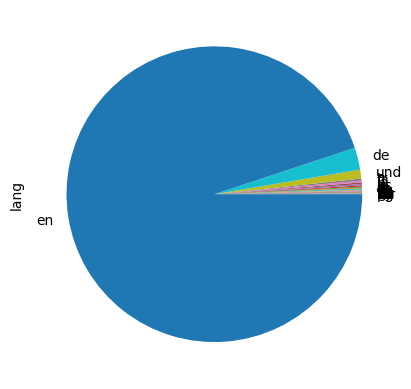

In [14]:
"""The resulting pie chart will display the distribution of tweets in different languages,
   with each language represented by a slice of the pie,
   and the size of the slice corresponding to the proportion of tweets in that language."""
data.lang.value_counts().sort_values().plot(kind = 'pie')

In [15]:
#This code snippet selects the content of the tweet at index 100 from the 'content' column of the data DataFrame and stores it in the variable text
text = data['content'][100]
text

'1) go to maps\n\n2) find a Russian city (like Moscow)\n\n3) find a restaurant, cafe or bar\n\n4) write a review but write about the war in #Ukraine \n\n5) post it\n\n#StandWithUkraine️ #StopPutin #SlavaUkraini #UkraineRussiaWar #Russia #UkraineUnderAttaсk #FBPE https://t.co/TEkreF6Q0a'

# Hashtag

In [16]:
import re
ht = re.findall(r"#(\w+)", text)
ht
"""This function call uses a regular expression pattern to find all substrings in text that start with '#' followed by one or more word characters (\w+).
   The r prefix before the string indicates a raw string, which is used to avoid interpreting backslashes as escape characters.  """

"This function call uses a regular expression pattern to find all substrings in text that start with '#' followed by one or more word characters (\\w+).\n   The r prefix before the string indicates a raw string, which is used to avoid interpreting backslashes as escape characters.  "

In [17]:
def hashtag_extract(text_corpus):
    hashtag=[]
    for text in text_corpus:
        ht = re.findall(r"#(\w+)", text)
        hashtag.append(ht)

    return hashtag

"""
This Python function, hashtag_extract, takes a list of text strings (text_corpus) as input and extracts hashtags from each text string
using a regular expression. It then returns a list of lists, where each inner list contains the hashtags extracted from a single text
string in the text_corpus. """

'\nThis Python function, hashtag_extract, takes a list of text strings (text_corpus) as input and extracts hashtags from each text string\nusing a regular expression. It then returns a list of lists, where each inner list contains the hashtags extracted from a single text\nstring in the text_corpus. '

In [18]:
def hashtag_freq(hashtag):
    a = nltk.FreqDist(hashtag) #Uses the FreqDist class from the nltk library to calculate the frequency of each unique hashtag
    d = pd. DataFrame({'Hashtah':list(a.keys()),
                  'Freq': list(a.values())}
                     )
    d = d.nlargest(columns="Freq",n = 30 )
    #Sorts the DataFrame d by the 'Freq' column in descending order and selects the top 30 rows.
    return d

In [19]:
hashtags = hashtag_extract(data['content'])
#The hashtag_extract function processes each text string in data['content'], extracts hashtags using a regular expression, and returns a list
#This variable stores the result of the hashtag_extract function, which is a list of lists where each inner list contains the hashtags extracted from a single tweet.

In [20]:
hashtags #This will display the list of lists containing the extracted hashtags from your dataset.

[['Ukraine'],
 [],
 ['IStandWithUkraine'],
 [],
 [],
 [],
 ['sanctions', 'russia', 'WW3', 'Ukraine', 'NATO', 'USA', 'war', 'Politics'],
 ['Russia', 'UkraineWar'],
 [],
 ['UkraineRussianWar', 'Ukraine', 'Russia', 'CzarVladimir'],
 [],
 ['Ukraine', 'StanGrant', 'Dutton', 'insiders', 'auspol'],
 [],
 [],
 [],
 [],
 ['UkraineRussianWar', 'Russia'],
 [],
 [],
 [],
 ['UKRAINE'],
 ['Russia', 'WWWIII'],
 [],
 [],
 ['TruckersConvoy2022', 'PutinWarCrimes', 'StopRussia', 'DemVoice1'],
 [],
 [],
 [],
 [],
 [],
 ['Ukraine',
  'NoWar',
  'Stop_the_War',
  'We_are_all_friends',
  'Wake_up_troops',
  'Hugs_to_all'],
 [],
 [],
 [],
 [],
 ['ukraine'],
 ['Ukraine'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['UkraineRussianWar',
  'IStandWithUkraine',
  'worldwar3',
  'AzovBattalion',
  'russia',
  'ukraine',
  'IStandWithPutin',
  'NoFlyZoneOverUkraine',
  'RussianArmy'],
 ['StopEnablingPutin'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Ukraine'],
 

In [21]:
hashtags = sum(hashtags,[]) #The sum() function is used with an empty list [] as the starting value and hashtags as the iterable.
hashtags #This variable now stores a single list containing all the hashtags extracted from the 'content' column of your dataset

['Ukraine',
 'IStandWithUkraine',
 'sanctions',
 'russia',
 'WW3',
 'Ukraine',
 'NATO',
 'USA',
 'war',
 'Politics',
 'Russia',
 'UkraineWar',
 'UkraineRussianWar',
 'Ukraine',
 'Russia',
 'CzarVladimir',
 'Ukraine',
 'StanGrant',
 'Dutton',
 'insiders',
 'auspol',
 'UkraineRussianWar',
 'Russia',
 'UKRAINE',
 'Russia',
 'WWWIII',
 'TruckersConvoy2022',
 'PutinWarCrimes',
 'StopRussia',
 'DemVoice1',
 'Ukraine',
 'NoWar',
 'Stop_the_War',
 'We_are_all_friends',
 'Wake_up_troops',
 'Hugs_to_all',
 'ukraine',
 'Ukraine',
 'UkraineRussianWar',
 'IStandWithUkraine',
 'worldwar3',
 'AzovBattalion',
 'russia',
 'ukraine',
 'IStandWithPutin',
 'NoFlyZoneOverUkraine',
 'RussianArmy',
 'StopEnablingPutin',
 'Ukraine',
 'Putin',
 'war',
 'WarCrimes',
 'ukraine',
 'StandWithUkrain',
 'russia',
 'NYC',
 'UkraineRussianWar',
 'UkraineWar',
 'cnn',
 'Ukraine',
 'Russia',
 'Ukraine',
 'RussiaUkraineConflict',
 'Ukraine',
 'Russia',
 'Ukraine',
 'US',
 'Iraq',
 'Ukraine',
 'Lybia',
 'Syria',
 'Afghani

In [22]:
import nltk

In [23]:
"""This code snippet uses the hashtag_freq function you defined earlier to calculate the frequency of each
   hashtag in the hashtags list and then stores the result in the hash variable. The hash variable will contain a pandas
   DataFrame with the 30 most frequent hashtags along with their frequencies.   """
hash=hashtag_freq(hashtags)
hash

,Hashtah,Freq
0,Ukraine,24373
9,Russia,10792
10,UkraineWar,4928
35,Putin,3481
7,war,3243
5,NATO,2735
28,ukraine,2189
74,War,1731
51,UkraineRussiaWar,1408
448,UkraineCrisis,1365


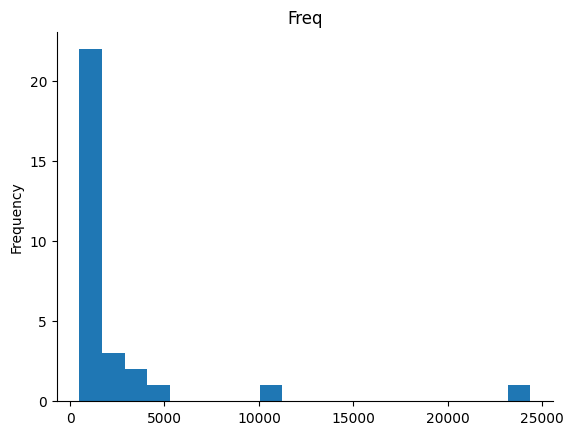

In [29]:
# @title Freq

from matplotlib import pyplot as plt
hash['Freq'].plot(kind='hist', bins=20, title='Freq')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (26,7))

<Figure size 2600x700 with 0 Axes>

<Figure size 2600x700 with 0 Axes>

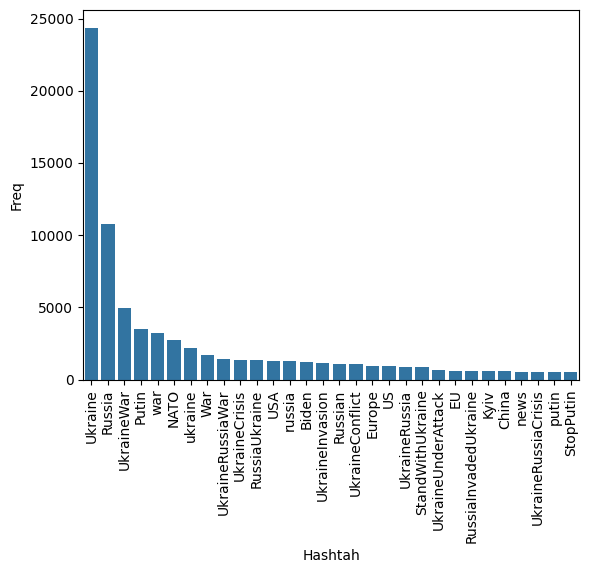

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'hash' is your DataFrame
# This code snippet uses the seaborn library to create a bar plot from the hash DataFrame, assuming that hash contains the frequency of hashtags.
ax = sns.barplot(data=hash, x='Hashtah', y='Freq')
plt.xticks(rotation=90)
plt.show()


In [27]:
data['total_length']=data['content'].str.len()
#After running this code, the data DataFrame will have a new column 'total_length' containing the length of each tweet in the 'content' column.

In [28]:
data[['content','total_length']]

,content,total_length
0,There was an anti war protest for #Ukraine as ...,324
1,https://t.co/Z1pURKlNHu NATO followed USA into...,280
2,@mfa_russia @RusEmbUSA @RussiaUN @MFA_Ukraine ...,319
3,@nytimes This war could have been avoided by e...,95
4,@ggreenwald Remember the biggest mistake made ...,258
...,...,...
231619,"Rusia wants to take back Ukraine, they are our...",176
231620,"A positive for Russia is that, according to Us...",277
231621,@kylegriffin1 @Karyn_resists “Further invades”...,113
231622,@remid0d0s0 @BillKristol I fully support Ukrai...,161
